# Resources

Selecting methods:

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

Implementations:

https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-an-introduction-1d8dc6d86c16

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

# 1. Feature Selection Methods

In [1]:
import os
import pandas as pd 
import scipy as sp
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
import glob
from matplotlib import pyplot as plt


path = './UGRdata/converted/'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
data = pd.concat(df_from_each_file, ignore_index=True)
data.shape




(48889953, 12)

# Constant Features
It show single values in all the observations in the dataset. These features provide no information that allows ML models to predict the target.

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Label'], axis=1), 
                                                    data.Label, test_size=0.3, 
                                                    random_state=0)

In [3]:
# select the numerical columns only.

numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]

In [4]:
# import and create the VarianceThreshold object.
from sklearn.feature_selection import VarianceThreshold
vs_constant = VarianceThreshold(threshold=0)

In [5]:
# fit the object to our data.

vs_constant.fit(numerical_x_train)
len(x_train[x_train.select_dtypes([np.number]).columns].columns[vs_constant.get_support()])

4

In [6]:
# get the constant colum names.

constant_columns = [column for column in numerical_x_train.columns
                    if column not in numerical_x_train.columns[vs_constant.get_support()]]
print(constant_columns)

['ForwardingStatus']


In [7]:
# detect constant categorical variables.

constant_cat_columns = [column for column in x_train.columns 
                        if (x_train[column].dtype == "O" and len(x_train[column].unique())  == 1 )]
all_constant_columns = constant_cat_columns + constant_columns
print(all_constant_columns)



['ForwardingStatus']


# Drop the constant features


In [76]:
x_train.drop(labels=constant_columns, axis=1, inplace=True)
x_test.drop(labels=constant_columns, axis=1, inplace=True)

In [72]:
"""
#print(x_train)
train_features_T = x_train.T
train_features_T.head()
print(train_features_T)
print('train features T duplicated:')
print(train_features_T.duplicated().sum())

duplicated_columns = train_features_T[train_features_T.duplicated()].index.values
print('duplicated columns')
print(duplicated_columns)
"""

                       955986        1531693       1019499       2250015  \
Timestamp         3.960000e+04  3.960000e+04  3.960000e+04  3.960000e+04   
FlowDuration      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
SrcIP             2.991985e+09  3.542697e+09  3.428921e+09  3.544173e+09   
DstIP             7.190328e+08  7.190356e+08  7.190347e+08  7.190361e+08   
SrcPort           1.934400e+04  5.588200e+04  3.691600e+04  5.086600e+04   
DstPort           5.300000e+01  8.000000e+01  5.300000e+01  4.430000e+02   
Protocol          2.000000e+00  1.000000e+00  2.000000e+00  1.000000e+00   
ForwardingStatus  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
TypeofService     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
PacketExed        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Bytes             0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                       2012645       217284        1505712      1470826  \
Timestamp   

KeyboardInterrupt: 

# Correlation methods


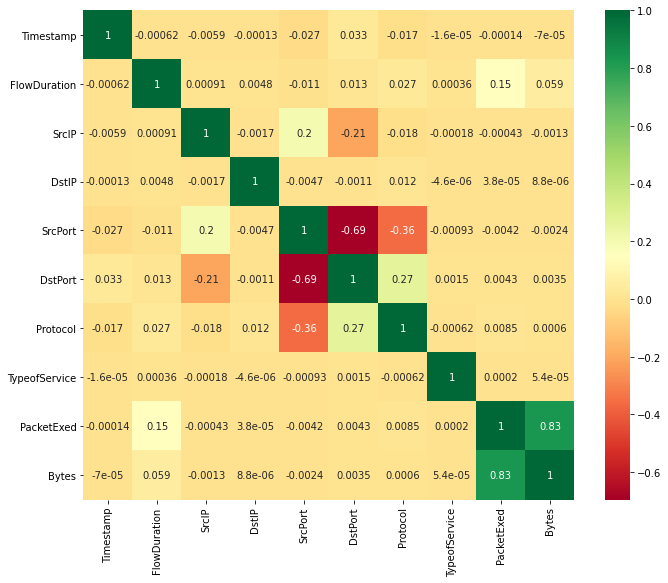

In [85]:
import seaborn as sns

correlated_features = set()
correlation_matrix = x_train.corr()

#plt.figure(figsize=(11,11))
#sns.heatmap(correlation_matrix)



#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11,9))
#plot heat map
g=sns.heatmap(correlation_matrix,annot=True,cmap="RdYlGn")



plt.savefig("./UGRdata/figure/correlation.pdf", bbox_inches='tight')


In [87]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

{'Bytes'}


## Drop Correlated Features

In [88]:

x_train.drop(labels=correlated_features, axis=1, inplace=True)
x_test.drop(labels=correlated_features, axis=1, inplace=True)


# Statistical Measures


In [95]:

from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error


# select the number of features you want to retain.
select_k = 8

# get only the numerical features.
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]


# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(mutual_info_classif, k=select_k).fit(numerical_x_train, y_train)

# display the retained features.
features = x_train.columns[selection.get_support()]
print(features)


Index(['Timestamp', 'FlowDuration', 'SrcIP', 'DstIP', 'SrcPort', 'DstPort',
       'Protocol', 'PacketExed'],
      dtype='object')


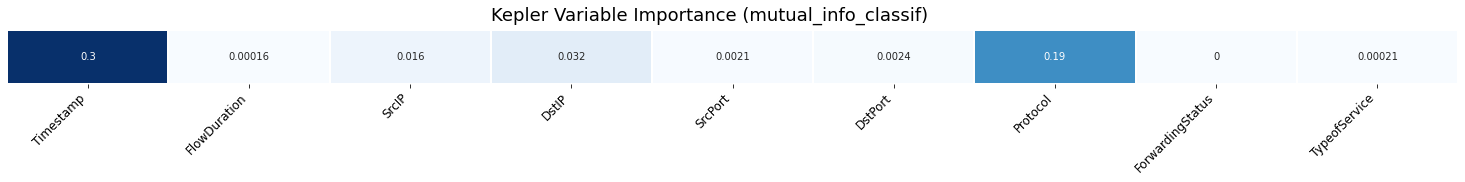

In [97]:
from sklearn.feature_selection import mutual_info_classif
kepler_mutual_information = mutual_info_classif(numerical_x_train, y_train)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(data.columns[1:], rotation=45, ha='right', fontsize=12)
#plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)


# 2. Generate UGR dataset


In [10]:
import os
import pandas as pd 
import scipy as sp
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
import glob
from matplotlib import pyplot as plt


path = './UGRdata/select_318_18_20/'
all_files = glob.glob(os.path.join(path, "*.csv"))
print(len(all_files))

df_from_each_file = (pd.read_csv(f) for f in all_files)
data = pd.concat(df_from_each_file, ignore_index=True)




3


In [11]:
data.head()
#data.shape

,Label,Timestamp,FlowDuration,SrcIP,DstIP,SrcPort,DstPort,Protocol,ForwardingStatus,TypeofService,PacketExed,Bytes
0,abnormal,64800,0.0,1816330234,719035615,25,56713,1,0.0,0.0,0.0,0.0
1,abnormal,64800,0.0,1816330234,719035615,25,49626,1,0.0,0.0,0.0,0.0
2,abnormal,64800,0.0,1816330234,719035615,25,41566,1,0.0,0.0,0.0,0.0
3,abnormal,64800,0.0,3230619516,719035615,25,55955,1,0.0,0.0,0.0,0.0
4,abnormal,64800,0.0,3230619516,719035615,25,40156,1,0.0,0.0,0.0,0.0


## Remove features after feature selection

In [12]:
data = data.drop(['ForwardingStatus', 'Bytes'], axis=1)
data.head()

,Label,Timestamp,FlowDuration,SrcIP,DstIP,SrcPort,DstPort,Protocol,TypeofService,PacketExed
0,abnormal,64800,0.0,1816330234,719035615,25,56713,1,0.0,0.0
1,abnormal,64800,0.0,1816330234,719035615,25,49626,1,0.0,0.0
2,abnormal,64800,0.0,1816330234,719035615,25,41566,1,0.0,0.0
3,abnormal,64800,0.0,3230619516,719035615,25,55955,1,0.0,0.0
4,abnormal,64800,0.0,3230619516,719035615,25,40156,1,0.0,0.0


## Save to file

In [13]:
data.to_csv('./aix360/data/heloc_data/ugr_dataset.csv', index = False)


# Other Methods

In [1]:
"""
# separate array into input and output components
x_train = df.iloc[:,1:11]
Y = df.iloc[:,0]
"""

NameError: name 'df' is not defined

In [ ]:
"""
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = x_train.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
#x_train.drop(labels=corr_features, axis=1, inplace=True)
#x_test.drop(labels=corr_features, axis=1, inplace=True)
"""

# Read Data 
Irrelevant or partially relevant features can negatively impact model performance.

In [ ]:
"""
import os
import pandas as pd 
import scipy as sp
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
import glob


path = './UGRdata/test/'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

"""




In [ ]:
"""
#df = read_csv('./UGRdata/parsed/selected_1000_blacklist_100.csv')
#print(df)
array = df.values


# Descriptive statistics
df.describe()
"""

In [ ]:
"""
# Analyse missing data
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(df)
"""

In [ ]:
"""
# Data types
df.dtypes
"""

In [ ]:
"""
# Transform categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)  # To avoid dummy trap
df.head()
"""

In [ ]:
"""
# separate array into input and output components
X = array[:,1:11]
Y = array[:,0]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(rescaledX[0:5,:])
print(rescaledX)
"""

Reference: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

#  Univariate Selection

We use the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the dataset.

In [ ]:
"""
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas import read_csv


import os

import scipy as sp

from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
import glob


path = './UGRdata/test/'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)


X = df.iloc[:,1:11]
Y = df.iloc[:,0]
#print(X)
#print(Y)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
#print(fit.scores_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
"""

# Feature Importance

In [ ]:
"""
import pandas as pd
import numpy as np
data = pd.read_csv("./UGRdata/parsed/selected_1000_blacklist_100_parsed.csv")
X = df.iloc[:,1:11]
Y = df.iloc[:,0]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
"""

# Correlation Matrix with Heatmap


In [ ]:
"""
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("./UGRdata/parsed/selected_1000_blacklist_100_parsed.csv")
X = df.iloc[:,1:11]
Y = df.iloc[:,0]
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
"""

In [ ]:
"""
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset.data, dataset.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
"""

In [ ]:
"""
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)
# display the relative importance of each attribute
print(model.feature_importances_)
"""